# Session 6 SHP - Machine Learning

## Linear Regression

Dalam Machine Learning, Linear Regression adalah metode untuk memprediksi nilai numerik berdasarkan hubungan linier antara variabel independen (fitur) dan variabel dependen (target).

Dalam konteks manufaktur produk bahan baku bubuk atau powder, regresi linier dapat digunakan untuk memahami dan memprediksi berbagai aspek produksi berdasarkan dataset Filling A1. Sebagai contoh:

**Kasus Penggunaan 1: Prediksi Berat Isi Kemasan**

Misalkan Anda bertanggung jawab atas mesin pengisi yang mengemas bahan baku bubuk ke dalam kemasan. Anda ingin memastikan bahwa setiap kemasan diisi dengan jumlah bubuk yang tepat - tidak terlalu banyak dan tidak terlalu sedikit, karena kesalahan ini bisa menyebabkan pemborosan produk atau kekecewaan pelanggan.

Anda mengumpulkan data historis dari mesin, termasuk kecepatan auger (yang menentukan seberapa cepat bubuk diisi), suhu penyegelan kemasan, dan berat aktual kemasan yang telah diisi. Dengan menggunakan regresi linier, Anda dapat membangun model yang memprediksi berat kemasan berdasarkan kecepatan auger dan suhu penyegelan.

**Kasus Penggunaan 2: Optimasi Pengaturan Mesin**

Dalam kasus lain, mungkin Anda ingin mengoptimalkan pengaturan mesin untuk mengurangi konsumsi energi atau meningkatkan kecepatan produksi tanpa mengorbankan kualitas produk. Anda mungkin memiliki data tentang berapa banyak energi yang digunakan mesin, berat kemasan, dan waktu yang dibutuhkan untuk mengisi kemasan tertentu.

Regresi linier dapat digunakan untuk mengeksplorasi hubungan antara konsumsi energi (sebagai variabel independen) dan berat kemasan (sebagai variabel dependen). Dengan demikian, Anda dapat menemukan setting kecepatan auger yang paling efisien yang masih menghasilkan berat kemasan yang diinginkan.

**Kasus Penggunaan 3: Menjamin Kualitas Produk**

Anda juga mungkin tertarik untuk memastikan kualitas produk tetap konsisten. Dalam hal ini, regresi linier bisa membantu Anda memahami seberapa besar pengaruh faktor-faktor seperti kecepatan auger, waktu penyegelan, dan suhu penyegelan terhadap variasi berat produk yang dihasilkan. Jika model menunjukkan bahwa faktor-faktor tertentu sangat mempengaruhi berat, maka Anda dapat menyesuaikan pengaturan tersebut untuk mencapai konsistensi yang lebih besar.

Dalam semua kasus ini, model regresi linier memberikan wawasan tentang hubungan antara variabel-variabel yang berbeda dan memungkinkan pengambilan keputusan yang lebih berdasarkan data untuk optimisasi proses produksi.

## 1. Load Dataset "Data FillingA1"

**ChatGPT Prompt:**

Berikan saya code python untuk menghubungkan google colab dengan google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**ChatGPT Prompt:**

Berikan code untuk load dataset "Data FillingA1.xlsx' pada folder Dataset di google drive

In [3]:
import pandas as pd

# Path ke file Excel di Google Drive
file_path = '/content/drive/My Drive/Dataset/Data FillingA1.xlsx'

# Membaca file Excel menggunakan pandas
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())


          dtmInsertedDate  intAugerAcc  intSpeedDischarge  intAugerTimeError  \
0 2023-10-25 19:55:03.227        12000                300                 10   
1 2023-10-25 19:55:13.193        12000                300                 10   
2 2023-10-25 19:55:23.257        12000                300                 10   
3 2023-10-25 19:55:33.207        12000                300                 10   
4 2023-10-25 19:55:43.287        12000                300                 10   

   intCrossJawSealTime  intVerticalSealTime  decCrossJawFrontSet  \
0                  300                    0                  155   
1                  300                    0                  155   
2                  300                    0                  155   
3                  300                    0                  155   
4                  300                    0                  155   

   decCrossJawFrontActual  decCrossJawRearSet  decCrossJawRearActual  \
0                   155.6             

Dataset **"Filling Mesin A1"** memiliki kolom-kolom berikut:

1. **dtmInsertedDate**: Tanggal dan waktu perekaman data, dengan format tahun-bulan-hari dan jam:menit:detik.milidetik.
2. **intAugerAcc**: Nilai akumulasi Auger, kemungkinan berhubungan dengan jumlah atau volume material yang diproses.
3. **intSpeedDischarge**: Kecepatan pengeluaran material dari mesin.
4. **intAugerTimeError**: Waktu kesalahan Auger, mungkin mengindikasikan penyimpangan dalam operasi normal.
5. **intCrossJawSealTime**: Waktu penyegelan Cross Jaw, dalam milidetik.
6. **intVerticalSealTime**: Waktu penyegelan Vertikal.
7. **decCrossJawFrontSet**: Pengaturan suhu depan Cross Jaw, dalam derajat.
8. **decCrossJawFrontActual**: Suhu aktual depan Cross Jaw.
9. **decCrossJawRearSet**: Pengaturan suhu belakang Cross Jaw.
10. **decCrossJawRearActual**: Suhu aktual belakang Cross Jaw.
11. **decVerticalJawSet**: Pengaturan suhu Jaw Vertikal.
12. **decVerticalJawActual**: Suhu aktual Jaw Vertikal.
13. **intWeight**: Berat, kemungkinan berhubungan dengan material yang diproses.
14. **intAugerSpeed**: Kecepatan Auger.
15. **Weight**: Berat tambahan atau koreksi berat.
16. **decimalBagLength**: Panjang kantong atau bungkus, dalam desimal.
17. **intMachineSpeed**: Kecepatan mesin.
18. **NoBO**: Nomor Batch Order atau identifikasi batch.
Kolom-kolom ini tampaknya menggambarkan parameter operasional dan pengukuran yang terkait dengan proses pengisian mesin A1, termasuk suhu, kecepatan, waktu, dan pengukuran berat

## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan code untuk melakukan EDA pada dataset tersebut

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dtmInsertedDate         2515 non-null   datetime64[ns]
 1   intAugerAcc             2515 non-null   int64         
 2   intSpeedDischarge       2515 non-null   int64         
 3   intAugerTimeError       2515 non-null   int64         
 4   intCrossJawSealTime     2515 non-null   int64         
 5   intVerticalSealTime     2515 non-null   int64         
 6   decCrossJawFrontSet     2515 non-null   int64         
 7   decCrossJawFrontActual  2515 non-null   float64       
 8   decCrossJawRearSet      2515 non-null   int64         
 9   decCrossJawRearActual   2515 non-null   float64       
 10  decVerticalJawSet       2515 non-null   int64         
 11  decVerticalJawActual    2515 non-null   float64       
 12  intWeight               2515 

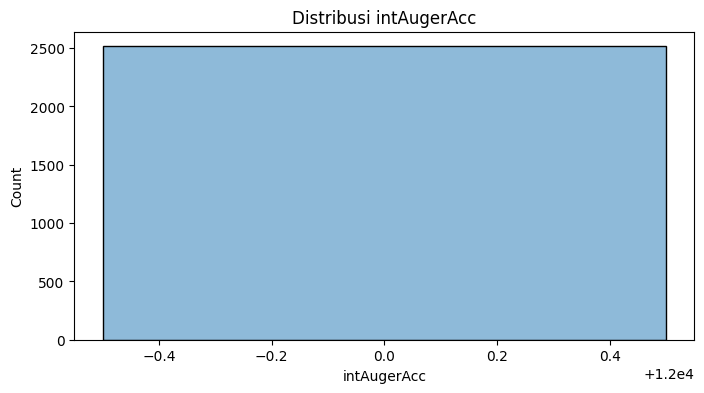

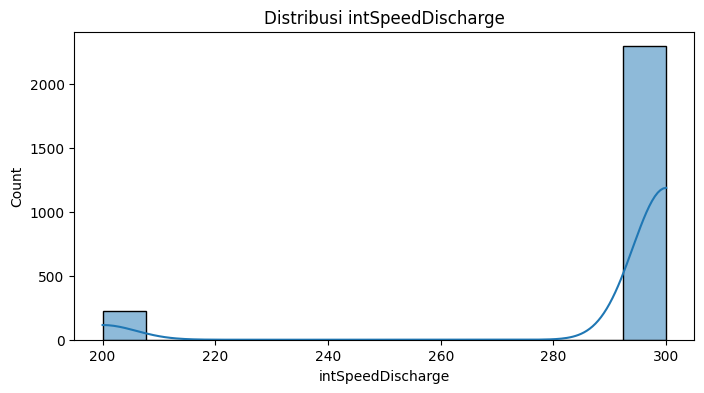

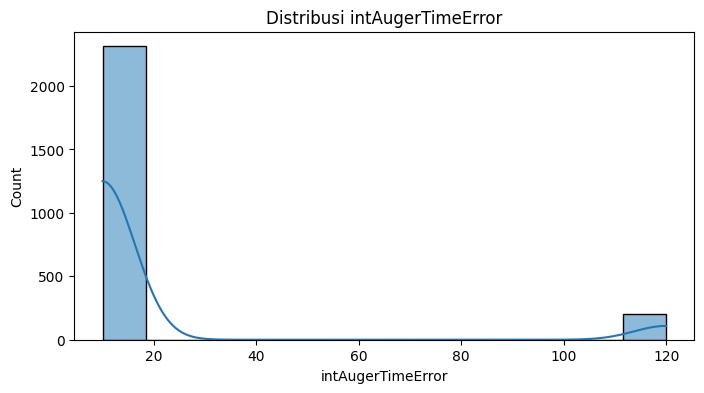

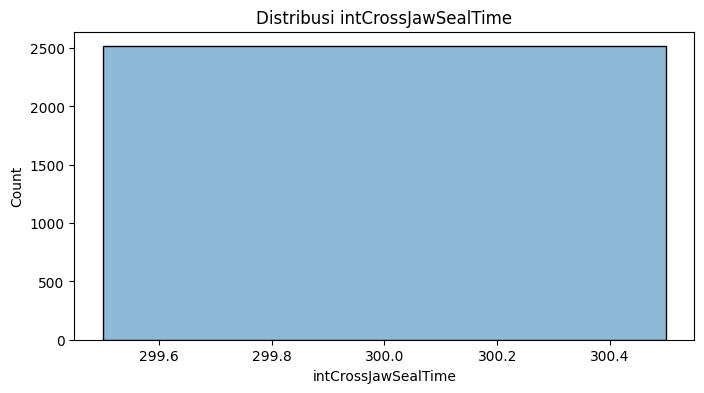

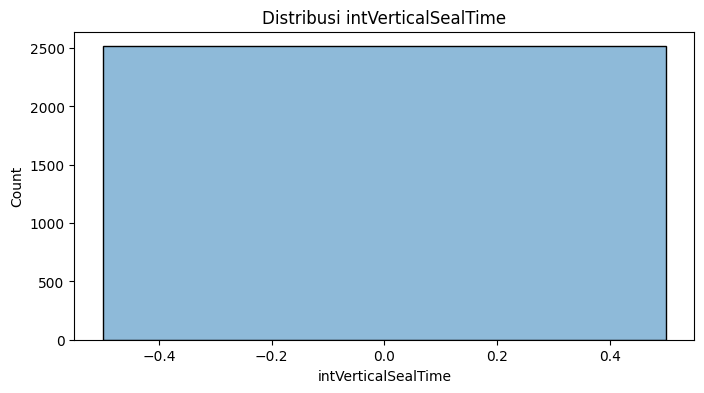

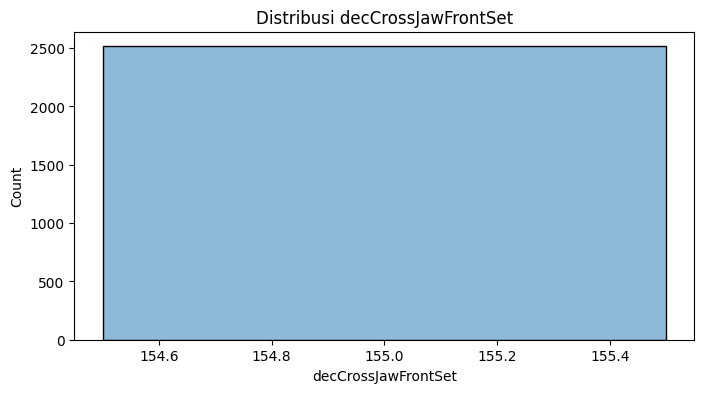

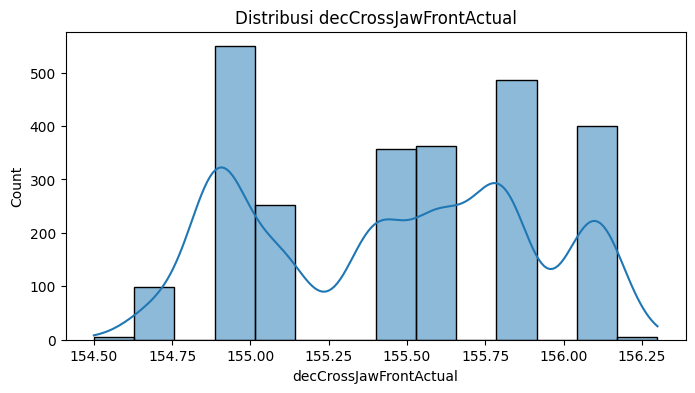

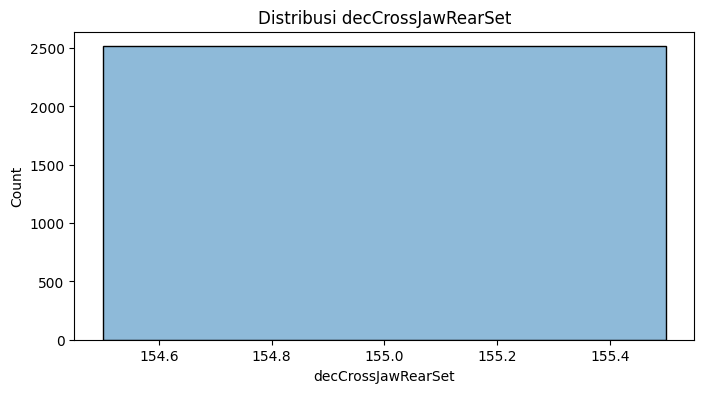

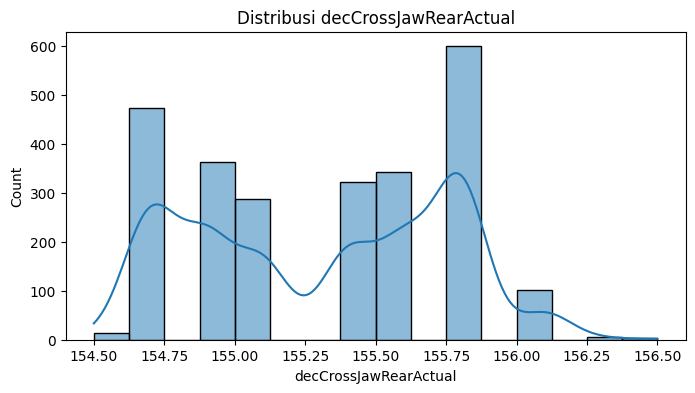

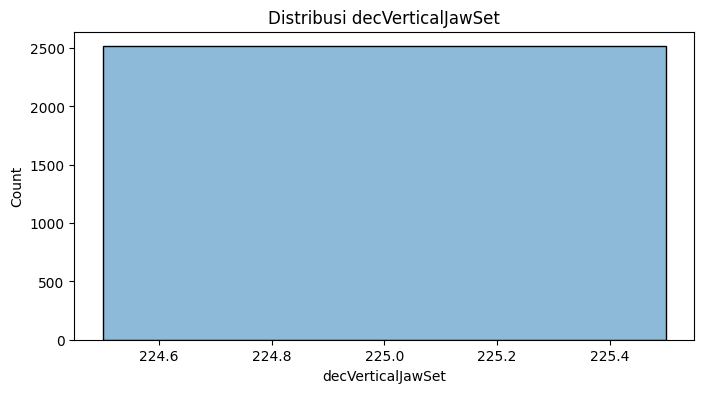

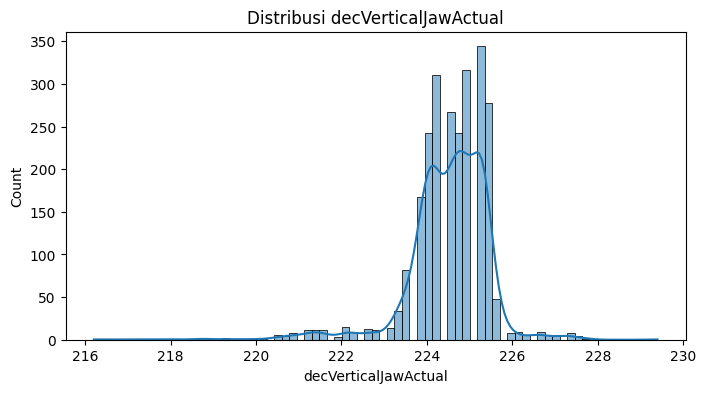

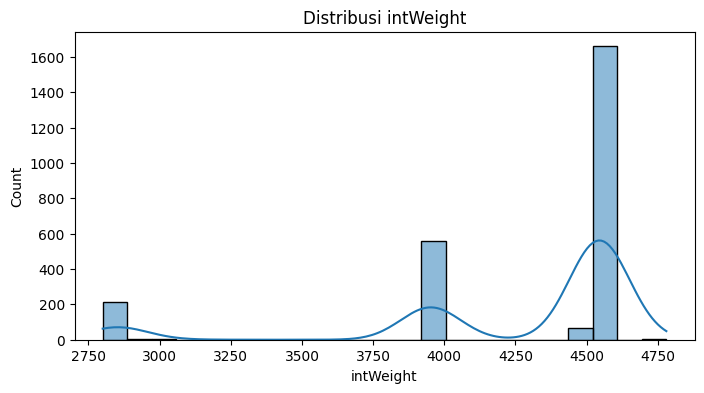

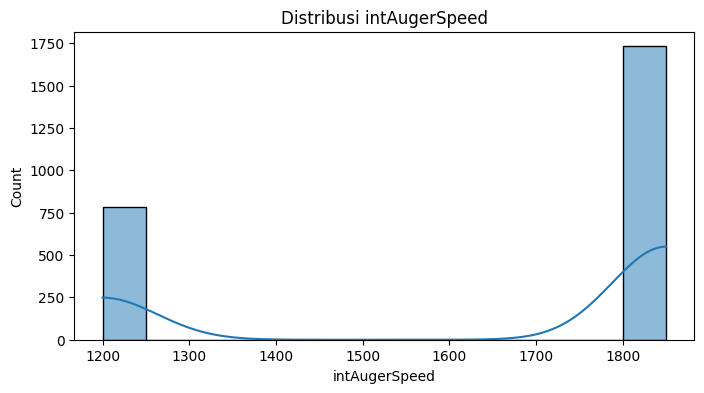

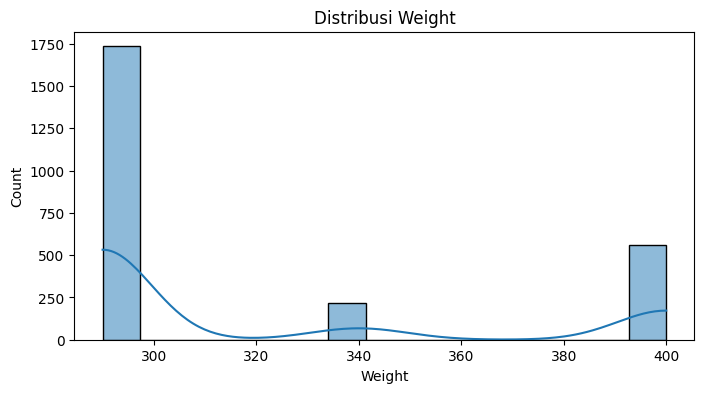

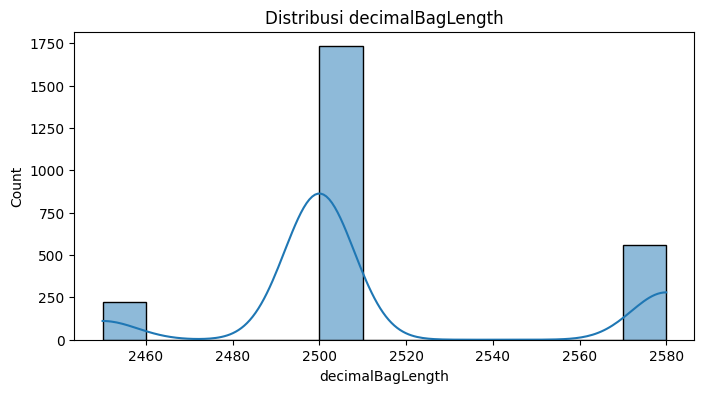

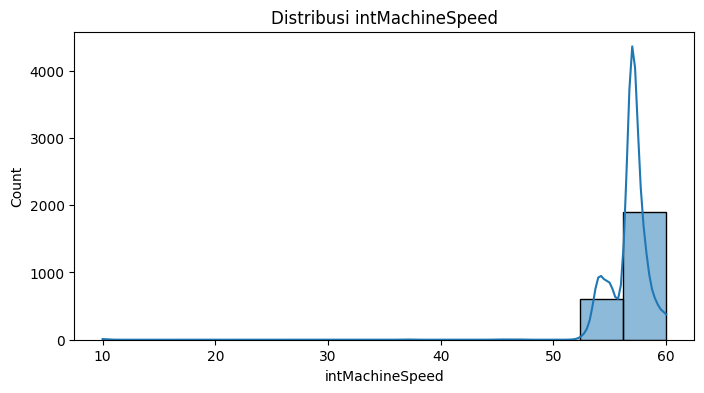

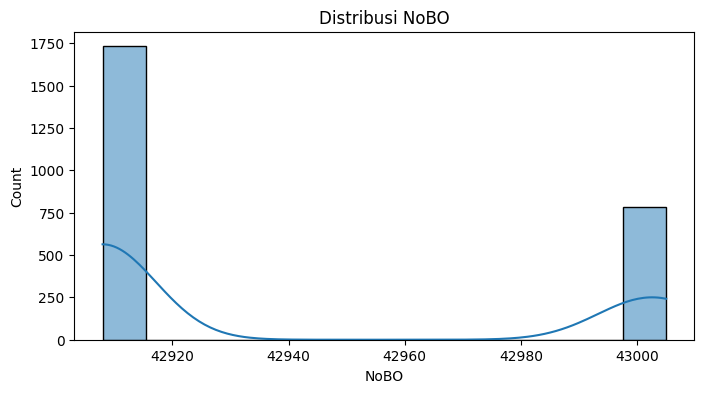

In [6]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Memeriksa missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualisasi distribusi variabel numerik
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()


## 3. Feature Selection

Feature selection adalah proses memilih fitur yang paling relevan untuk digunakan dalam model Machine Learning. Dalam konteks Simple Linear Regression, yang merupakan metode regresi paling dasar dan mengasumsikan hubungan linear antara satu fitur independen dan variabel dependen (target), feature selection menjadi sangat penting untuk memastikan efektivitas dan efisiensi model.

Dari eksperimen menggunakan Orange Data Mining, kita akan menggunakan **kolom "intAugerSpeed" sebagai fitur dan kolom "Weight" sebagai target**

Dalam konteks manufaktur, kolom "Berat" (Weight) sebagai target mengacu pada tujuan untuk memprediksi berat produk berdasarkan parameter operasional mesin, seperti kecepatan auger (intAugerSpeed), suhu, dan kecepatan mesin. Pendekatan ini sangat relevan jika Anda ingin memantau kinerja mesin untuk memastikan bahwa produk diisi hingga mencapai berat tertentu, yang merupakan prosedur kontrol kualitas yang umum dalam manufaktur.

Apabila "Berat" adalah hasil yang ingin Anda kendalikan (membuatnya sebagai target), maka Anda akan membangun model untuk memprediksi berat berdasarkan variabel-variabel seperti kecepatan auger. Dalam kebanyakan proses manufaktur, "Berat" sering kali menjadi variabel target karena tujuannya biasanya adalah untuk memastikan bahwa setiap produk memenuhi spesifikasi berat tertentu.

**ChatGPT Prompt:**

Berikan code untuk membagi dataset menjadi data training dan testing untuk machine learning. Atur kolom "intAugerSpeed" menjadi fitur dan kolom "Weight" menjadi target


In [9]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split

# Menentukan fitur dan target
X = df[['intAugerSpeed']]  # Fitur (dalam bentuk DataFrame)
y = df['Weight']           # Target

# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data training dan testing
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (2012, 1)
Ukuran X_test: (503, 1)
Ukuran y_train: (2012,)
Ukuran y_test: (503,)


## 4. Training Machine Learning

Untuk melatih model regresi linier menggunakan dataset yang Anda miliki dan kemudian mengevaluasi model tersebut, Anda dapat menggunakan library scikit-learn di Python. Langkah-langkahnya termasuk melatih model dengan data training (X_train dan y_train) dan kemudian mengevaluasi kinerjanya dengan data testing (X_test dan y_test).

In [10]:
# Import library yang diperlukan
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat instance model regresi linier
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi nilai target dengan data testing
y_pred = model.predict(X_test)

# Menghitung dan menampilkan metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 217.86451822600586
R^2 Score: 0.8975875395566384


Dalam kode ini:

* **LinearRegression()** digunakan untuk membuat instance model regresi linier.
* **fit** digunakan untuk melatih model dengan data training.
* **predict** digunakan untuk membuat prediksi pada data testing.
* **mean_squared_error** dan **r2_score** digunakan untuk menghitung metrik evaluasi. Mean Squared Error (MSE) adalah rata-rata kuadrat error antara nilai sebenarnya dan nilai prediksi, sedangkan R^2 Score (koefisien determinasi) mengukur seberapa baik model dapat menjelaskan variabilitas data.

Metrik evaluasi ini memberikan informasi tentang kinerja model. MSE yang rendah dan R^2 yang tinggi menunjukkan model yang lebih baik. Namun, interpretasi metrik ini juga harus mempertimbangkan konteks dan jenis data yang digunakan.

## 5. Actual vs Predicted

ChatGPT Prompt:

Berikan code untuk menampilkan data prediksi dari hasil linear regression dengan data sebenarnya

In [11]:
# Import library pandas
import pandas as pd

# Memprediksi nilai target dengan data testing
y_pred = model.predict(X_test)

# Membuat DataFrame untuk membandingkan nilai sebenarnya dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Menampilkan beberapa baris pertama dari DataFrame
print(comparison_df.head())


      Actual   Predicted
617      290  290.000000
927      290  290.000000
942      290  290.000000
973      290  290.000000
1967     400  382.492013
